# Pixelizes animations

## Imports

In [1]:
# Python standard library

# Scientific computing
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.misc


# For gif
import IPython.display
import PIL.Image

import imageio



## Import image

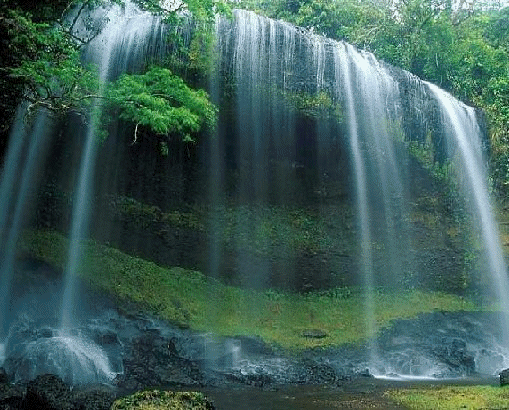

In [2]:
source_file_path = './source/waterfall/waterfall.gif'

with open(source_file_path) as file_handle:
    IPython.display.display(IPython.display.Image(data=file_handle.read(), format='png'))

## Convert to single frames

In [5]:
def extractFrames(inGif, outFolder):
    frame = PIL.Image.open(inGif)
    nframes = 0
    while frame:
        frame.save(source_file_path.replace('.gif', '_' + str(nframes) + '.gif'), 'GIF')
        nframes += 1
        try:
            frame.seek( nframes )
        except EOFError:
            break;
    

extractFrames(source_file_path, './')

## Load individual frames

In [7]:
frames = [scipy.ndimage.imread('./source/waterfall/waterfall_' + str(i) + '.gif') for i in range(4)]

## Transform

In [26]:
plot_all = False
transformeds = []

for frame in frames:

    # Raw
    source = frame


    # Copy
    transformed = np.copy(source)





    # Pixelize
    transformed = np.copy(scipy.misc.imresize(transformed, (128,128)))

    if plot_all:
        print 'pixelize', transformed.shape
        plt.imshow(transformed)
        plt.show()

    # Increase size
    transformed = np.copy(scipy.misc.imresize(transformed, (48, 48)))

    if plot_all:
        print 'resize', transformed.shape
        plt.imshow(transformed)
        plt.show()


    



    # Save
    save = True
    if save:
        pass
        #scipy.misc.imsave(source_file_path.replace('.png', '_transformed.png'), transformed)
        #plt.savefig(source_file_path.replace('.jpg', '_transformed.png'), dpi = 100)
        #transformed.tofile(source_file_path.replace('.jpg', '_transformed.csv'),  fmt = np.uint8, delimiter=',')

    plt.show()
    
    transformeds.append(transformed)

In [27]:
for i, transformed in enumerate(transformeds):
    scipy.misc.imsave('./source/waterfall/waterfall_' + str(i) + '.gif', transformed)

In [28]:
images = []
filenames = ['./source/waterfall/waterfall_' + str(i) + '.gif' for i in range(4)]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./source/waterfall/waterfall_transformed.gif', images)